In [42]:
import account_templates as at
import altair as alt
import pandas as pd
import refunc as rf
import numpy as np
import os
import pickle
import rebalance_account as ra
import rebalance_portfolio as rp
import scenarios as sc
import xarray as xr

idx = pd.IndexSlice
alt.data_transformers.enable("json")
pd.set_option("display.max_columns", 100)

In [43]:
# Set up directory for saving chart data
print("Set up Altair plot data directory")


def json_dir(data, data_dir="altair_data"):
    os.makedirs(data_dir, exist_ok=True)
    return alt.pipe(
        data, alt.to_json(filename=data_dir + "/{prefix}-{hash}.{extension}")
    )


alt.data_transformers.register("json_dir", json_dir)
alt.data_transformers.enable("json_dir", data_dir="altair_data")

Set up Altair plot data directory


DataTransformerRegistry.enable('json_dir')

In [44]:
print("Software versions.")
print("Altair: ", alt.__version__)
print("JupyterLab : 0.35.3")
print("Numpy: ", np.__version__)
print("Pandas: ", pd.__version__)
print("Xarray: ", xr.__version__)

Software versions.
Altair:  2.4.1
JupyterLab : 0.35.3
Numpy:  1.15.4
Pandas:  0.23.4
Xarray:  0.11.3


In [45]:
# Converting scenario dicts to DataFrames

# The code below will collect the dictionaries saves as part of the scenario process for either accounts or portfolios 
# and combine them and convert them to DataFrames.

# # used to iterate through the dictionary files and put into one dict, then dataframe.
# from os import walk
# directory = "./scenario_data/data_port/"

# f = []
# for (dirpath, dirnames, filenames) in walk(directory):
#     f.extend(filenames)
#     break

# data_dict = {}
# for x in f: 
#     dict1 = {}
#     filename = directory + x
#     infile = open(filename, "rb")
#     dict1 = pickle.load(infile)
#     infile.close()
#     data_dict.update(dict1)

# df = pd.DataFrame.from_dict(data_dict).T

# # (du, sd, ac, rb, dr, tx, mf, at, rr)
# df.index.names = [
#     "accounts_list",
#     "start_date",
#     "duration", 
#     "rebalance_period",
#     "asset_mix",
#     "rebalance_range",
# ]

# df.columns.names = ["account_portfolio", "ratios"]

# # pickle the dataframe for use in other analysis
# with open("./scenario_data/portfolios.pickle", "wb") as f:
#     pickle.dump(df, f)

In [46]:
# Open scenarios

# The following will generate dataframes from pickle files for the accounts and portfolio scenarios.
# Open the stored account and portfolio dataframes.

filename_acct = 'scenario_data/accounts.pickle'
infile = open(filename_acct, "rb")
dfa = pickle.load(infile)
infile.close()

filename_port = 'scenario_data/portfolios.pickle'
infile = open(filename_port, "rb")
dfp = pickle.load(infile)
infile.close()

filename_port_final = 'scenario_data/portfolios_final.pickle'
infile = open(filename_port_final, "rb")
dff = pickle.load(infile)
infile.close()

filename_port_final_three = 'scenario_data/portfolios_final_three.pickle'
infile = open(filename_port_final_three, "rb")
dft = pickle.load(infile)
infile.close()

filename_port_aa= "scenario_data/port_aa.pickle"
infile = open(filename_port_aa, "rb")
dfl = pickle.load(infile)
infile.close()


# Executive Summary

There are a number of standard mechanisms by which a passive investor can influence their returns. These include: 

- dividend reinvestment plans
- sweeping cash to no load index funds until rebalancing occurs
- tax efficient portfolio level/multi-account rebalancing
- adjusting the range around a target allocation
- increasing or decreasing the periodicity of rebalancing (e.g. annual, quarterly...)
- increasing the minimum trade dollar to reduce excessive trading

This analysis looked at the after-tax returns of basic Canadian fixed income and equity accounts and portfolios from 2002 - 2018. This analysis found that most of the above mechanisms do not offer increased yields over the time measured. 

However, it was determined that by managing the asset allocation process so that equities are favoured in taxable accounts as well as the lower income partner or spouse when available, that almost 25 bps of extra yield could be achieved over doing nothing and up to 50 bps over the poorest performing allocation. 

Given that passive investors typically under perform the market by the expense ratio of the exchange traded fund, this strategy could help to put the investor on par with the market itself. 

The software built for this analysis can only review two funds at a time. Further research could be done on multi-asset portfolios to determine if allocating equities to lower tax individuals and taxable accounts will still pick up yield over allocating by individual accounts.



# Purpose

Most efforts in retail investment management revolve around generating and implementing strategies that will increase returns  and reduce risk. Passive investment strategies, of which I am a proponent, seek to give investors market returns less costs, which are kept to a minimum. Within a passive investment framework, there are some simple strategies that are used to try to increase returns that require no great investment skill. These include: 

- dividend reinvestment plans
- sweeping cash to no load index funds until rebalancing occurs
- tax efficient portfolio level/multi-account rebalancing
- adjusting the range around a target allocation
- increasing or decreasing the periodicity of rebalancing (e.g. annual, quarterly...)
- increasing the minimum trade dollar to reduce excessive trading
- minimizing trade fees

To see the actual effects of some of these strategies, I developed this program that would look at the performance in the real world. 

# Method

This analysis will re-create investment accounts and portfolios of accounts (portfolios) using cash, fixed income, and equity for asset classes. This analysis will be from a Canadian view point. Investment accounts will be recreated using the parameters mentioned above and a calculation will be made for after-tax, after-cost performance.  

### Securities

For the purposes of this analysis, and to keep the programming realistic, the portfolio consists of two Canadian exchange trade funds to represent fixed income and equity securities. Cash was a non-interest bearing account. 

Fixed income was represented by IShares Core Canadian Universe Bond Index ETF, XBB. 
Equity was represented by iShares S&P/TSX Capped Composite Index ETF, XIC.

These are both broadly based market indices with very low MERs, high liquidity, and long track records, back as far as 2002.

When sweeping to mutual funds, TD Bond and TD Canadian Equity funds were used for fixed income and equity respectively. 

Creating more diversified options with greater securities was beyond the scope of this exercise.

# Financial Functions

Standard financial functions were calculated as results for the accounts and portfolio analysis. Quantopian's empyrical library was used. The primary functions discussed are annual return, annual volatility, and sharpe ratio, but other ratios are included for completeness. 
-  annual_return
-  annual_volatility
-  cagr
-  calmar
-  cumm_return
-  max_drawdown
-  sharpe 
-  sortino
-  tail_ratio

An index of these ratios for full explanations is found here: http://quantopian.github.io/empyrical/genindex.html

# Account Parameters
All accounts are calculated based upon a dictionary of account parameters. Below are two examples of such dictionaries for calculating an investment account in full detail.

In [47]:
dict_with_notes = {
    # Account name, format should reflect nature of account.
    "name": "Investment No Drip",
    # One line description of the account
    "description": "Investment without a DRIP program",
    # The date range for analysis,
    # must be between 2002-01-01 and 2018-12-31.
    "start_date": "2001-01-01",
    "end_date": "2011-12-31",
    # All deposits including initial deposit should be stated here.
    # List of dates and deposits/withdrawals in dictionary format.
    # Negative number for withdrawals. The dates in the template are
    # the defaults.
    "dep_with": {"2002-01-01": 100000},
    # Transactions subject to tax
    # TFSA:          transactions = False,      withdrawals = False
    # RRSP:          transaeections = False,      withdrawals = True
    # Taxable:       transactions = True,      withdrawals = False
    "taxable_transactions": True,
    # RRSPs have tax on withdrawal, this shown accrued in taxes
    "taxable_withdrawal": False,
    # Marginal tax rates for Ontario at $75,000 income
    # for general tax like rsp withdrawal or interest income.
    "tax_rate": 0.3148,
    # Tax rate on Canadian dividends as a percent of tax_rate.
    "tax_div": 0.0892,
    # Inclusion rate tax rate on capital gains realized.
    "tax_gains": 0.1574,
    # Schedule for portfolio rebalancing,
    # Alias	Description
    # D	    Day
    # M	    Month end
    # Q	    Quarter end
    # A	    Year end
    # BA	Business year end
    "rebalance_period": "M",
    # Trading Fees
    # Trade_fee or slippage defaults to $7.50, 0 if no fee.
    "trade_fee": 7.50,
    # Minimum trade size.
    "minimum_trade_dollar": 0.00,
    # Dividends reinvested with no cost, drip=True
    # otherwise to cash for later rebalancing.
    "drip": True,
    # Mutual funds used for cash management, cost reduction.
    "mutual_funds": False,
    # Asset allocations, all values between 0 and 1.
    # Target allocations must add up to 1.0.
    "atar_cash": 0,
    "atar_fixed_income": 0.5,
    "atar_equity": 0.5,
    # Maximum allocation limits.
    "amax_cash": 0.025,
    "amax_fixed_income": 0.55,
    "amax_equity": 0.55,
    # Minimum allocation limits.
    "amin_cash": -0.005,
    "amin_fixed_income": 0.45,
    "amin_equity": 0.45,
    # Rebalance from maximum to rmax level.
    "rmax_cash": 0,
    "rmax_fixed_income": 0.50,
    "rmax_equity": 0.50,
    # Rebalance from minimum to rmin level.
    "rmin_cash": 0,
    "rmin_fixed_income": 0.5,
    "rmin_equity": 0.5,
}

# Typically without notes, the dictionary shortens up as follows:

inv = {
    "name": "Investment Account",
    "description": "Sample taxable investment account.",
    "start_date": "2002-01-01",
    "end_date": "2011-12-31",
    "dep_with": {"2002-01-01": 100000, 
                "2003-01-01": 100000},
    "taxable_transactions": True,
    "taxable_withdrawal": False,
    "tax_rate": 0.4341,
    "tax_div": 0.2952,
    "tax_gains": 0.2170,
    "rebalance_period": "M",
    "trade_fee": 7.50,
    "minimum_trade_dollar": 0.0,
    "drip": False,
    "mutual_funds": False,
    "atar_cash": 0,
    "atar_fixed_income": 0.5,
    "atar_equity": 0.5,
    "amax_cash": 0.025,
    "amax_fixed_income": 0.55,
    "amax_equity": 0.55,
    "amin_cash": -0.005,
    "amin_fixed_income": 0.45,
    "amin_equity": 0.45,
    "rmax_cash": 0,
    "rmax_fixed_income": 0.50,
    "rmax_equity": 0.50,
    "rmin_cash": 0,
    "rmin_fixed_income": 0.5,
    "rmin_equity": 0.5,
}

# Accounts

The foundation of the analysis is the account dataframe. By calling the rebalance_account function in the rebalance_account module (ra), using the above dictionary parameter format, the rebalance_account function calculates the return of the portfolio and generates a full accounting of the account over the specified time frame. 

The key point of making a custom account calculation is to be able to determine the after-tax, after-costs performance over a wide range of input parameters. This can be found in the value_after_tax columns, which is then turned into percent returns (pct_change), which are in turn used to generate the financial rations for analysis.

The account function takes into account:

- multiple deposits and withdrawals
- dividends and drips
- purchases and sales
- target allocations and rebalance limits
- market value of securities, total value including cash, after tax value of the portfolio
- accrued tax in the unrealized value of the securities or unsold rrsps
- taxes for dividends, gains, and total realized taxes
- transactional costs
- current allocations in percent and dollars
- security level accounting, including: 
    - net asset value per share
    - units/shares traded
    - total units/shares
    - market value
    - dividends
    - adjusted cost base
    - asset class and fund type

    
    


Below is an example of a regular account dataframe. This is for the investment account above, 'Investment Account', or 'inv'. 

Included at the far right of the dataframe are daily return columns. In comparing percent change vs. logarithmic calculations, there was insufficient difference to effect the conclusions. Therefore, percent change (pct_change) is used throughout the analysis.

In [48]:
ra.rebalance_account(inv).tail()

,cash,dep_with,dividends,purchases,sales,market_value,total_value,total_value_norm,tax_accrued,tax_dividend,tax_gain,tax_realized,tax_total,value_after_tax,value_after_tax_norm,costs,rebalanced,cash_allocation,fixed_income_allocation,equity_allocation,cash_total,fixed_income_total,equity_total,XBB-nav_per_share,XBB-unit_traded,XBB-unit,XBB-value,XBB-dividends,XBB-acb,XBB-asset_class,XBB-fund_type,XIC-nav_per_share,XIC-unit_traded,XIC-unit,XIC-value,XIC-dividends,XIC-acb,XIC-asset_class,XIC-fund_type,TD_Bond-nav_per_share,TD_Bond-unit_traded,TD_Bond-unit,TD_Bond-value,TD_Bond-dividends,TD_Bond-acb,TD_Bond-asset_class,TD_Bond-fund_type,TD_CDN_Equity-nav_per_share,TD_CDN_Equity-unit_traded,TD_CDN_Equity-unit,TD_CDN_Equity-value,TD_CDN_Equity-dividends,TD_CDN_Equity-acb,TD_CDN_Equity-asset_class,TD_CDN_Equity-fund_type,pct_change,log_ret
trade_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-12-22,622.309663,0,0.000000,0.0,0.0,366292.718267,366915.027930,3.669701,17618.219099,0.000000,0.0,47057.305758,64675.524857,302239.503073,3.022750,187.5,False,0.001696,0.510767,0.487537,622.309663,187407.916120,178884.802147,31.420373,0.0,5964.535052,187407.916120,0.00000,27.822402,Canadian,ETF,18.694163,0.0,9569.019065,178884.802147,0.00000,12.452173,Canadian,ETF,11.65,0.0,0.0,0.0,0.0,0,Canadian,Mutual Fund,18.96,0.0,0.0,0.0,0.0,0,Canadian,Mutual Fund,0.005022,0.005009
2011-12-23,1595.549110,0,1483.832971,0.0,0.0,366406.249091,368001.798201,3.680570,17642.855288,510.593523,0.0,47567.899281,65210.754569,302791.043632,3.028266,187.5,False,0.004336,0.507477,0.488187,1595.549110,186752.461434,179653.787657,31.310481,0.0,5964.535052,186752.461434,0.08759,27.822402,Canadian,ETF,18.774525,0.0,9569.019065,179653.787657,0.10047,12.452173,Canadian,ETF,11.61,0.0,0.0,0.0,0.0,0,Canadian,Mutual Fund,19.05,0.0,0.0,0.0,0.0,0,Canadian,Mutual Fund,0.001825,0.001823
2011-12-28,1595.549110,0,0.000000,0.0,0.0,364188.095849,365783.644960,3.658385,17161.516035,0.000000,0.0,47567.899281,64729.415316,301054.229644,3.010896,187.5,False,0.004362,0.512155,0.483483,1595.549110,187338.059485,176850.036364,31.408661,0.0,5964.535052,187338.059485,0.00000,27.822402,Canadian,ETF,18.481522,0.0,9569.019065,176850.036364,0.00000,12.452173,Canadian,ETF,11.65,0.0,0.0,0.0,0.0,0,Canadian,Mutual Fund,18.75,0.0,0.0,0.0,0.0,0,Canadian,Mutual Fund,-0.005736,-0.005753
2011-12-29,1595.549110,0,0.000000,0.0,0.0,366015.391898,367610.941009,3.676661,17558.039277,0.000000,0.0,47567.899281,65125.938559,302485.002450,3.025205,187.5,False,0.004340,0.509762,0.485898,1595.549110,187393.977001,178621.414897,31.418036,0.0,5964.535052,187393.977001,0.00000,27.822402,Canadian,ETF,18.666638,0.0,9569.019065,178621.414897,0.00000,12.452173,Canadian,ETF,11.65,0.0,0.0,0.0,0.0,0,Canadian,Mutual Fund,18.94,0.0,0.0,0.0,0.0,0,Canadian,Mutual Fund,0.004753,0.004741
2011-12-30,1595.549110,0,0.000000,0.0,0.0,367740.340352,369335.889463,3.693913,17932.353092,0.000000,0.0,47567.899281,65500.252373,303835.637090,3.038713,187.5,False,0.004320,0.507443,0.488237,1595.549110,187417.018000,180323.322352,31.421899,0.0,5964.535052,187417.018000,0.00000,27.822402,Canadian,ETF,18.844494,0.0,9569.019065,180323.322352,0.00000,12.452173,Canadian,ETF,11.65,0.0,0.0,0.0,0.0,0,Canadian,Mutual Fund,19.12,0.0,0.0,0.0,0.0,0,Canadian,Mutual Fund,0.004465,0.004455


Using xarray one can clearly see the dimensions used in creating account dataframes. 

In [49]:
dfa.to_xarray().coords

Coordinates:
  * duration          (duration) object '10 year' '3 year' '5 year'
  * start_date        (start_date) object '2002-01-01' ... '2009-01-01'
  * account_type      (account_type) object 'inv' 'rsp' 'tfsa'
  * rebalance_period  (rebalance_period) object 'D' 'M' 'Q' 'Y'
  * drip              (drip) object False True
  * tax_rate          (tax_rate) object 'high' 'low' 'medium'
  * mutual_fund       (mutual_fund) object False True
  * asset_mix         (asset_mix) object '25/75' '50/50' '75/25'
  * rebalance_range   (rebalance_range) object 'broad' 'narrow'

# Considerations

- All ratios calculated after tax. 
- RSPs seeded with more money to account for inherent tax obligation. Based on: amount_invested / (1 - personal_tax_rate)

# Account Type

- Mean result calculated over all start dates, durations, drip, mutual funds, rebalance range, 

Key findings: 

- RSPs and TFSAs exhibit much bettter sharpe ratios, mid-.9's compared to .71 for taxable account.
- RSPs earning 2.1% more than tax, tfsa earn 3.2% more than taxable.
- RSP has best combination of volitility and return , but it's close with TFSA.



In [50]:
dfa.groupby(['account_type']).mean()

ratios,annual_return,annual_volatility,cagr,calmar,cumm_return,max_drawdown,sharpe,sortino,tail_ratio
account_type,,,,,,,,,
inv,0.080204,0.148778,0.080204,0.666247,1.157314,-0.161924,0.712093,1.850860,0.902376
rsp,0.101480,0.124926,0.101480,0.849682,1.112554,-0.182360,0.967237,1.866510,0.938844
tfsa,0.112383,0.158603,0.112383,0.900526,1.579443,-0.182394,0.936296,2.135935,0.938715


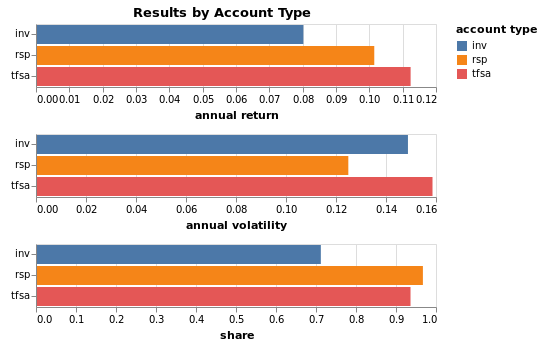

In [51]:
dfag = dfa.reset_index()
at_return = alt.Chart(dfag, title='Results by Account Type').mark_bar().encode(
    x=alt.X('mean(annual_return):Q', title='annual return'),
    y=alt.Y('account_type:N', title=""), 
    color=alt.Color('account_type', title='account type')
)
at_vol = alt.Chart(dfag).mark_bar().encode(
    x=alt.X('mean(annual_volatility):Q', title='annual volatility'),
    y=alt.Y('account_type:N', title=""), 
    color='account_type'
)
at_sharpe = alt.Chart(dfag).mark_bar().encode(
    x=alt.X('mean(sharpe):Q', title='share'),
    y=alt.Y('account_type:N', title=""), 
    color='account_type'
)
at_return & at_vol &  at_sharpe

## Dividend Reinvestment Plans

DRIPs have been touted as a sensible way to reinvest dividend cash flow so as not to miss out on the market and also to keep trading costs low, since DRIPs do not have a trading commission. Regardless of the outcome, DRIPs do reduce the effort involved in rebalancing. 

But what does the data say about the effectiveness of DRIPs in this analysis? 

If DRIPs are averaged over all scenarios, there is very little to separate the results. The results difference is statistically insignificant for both returns and sharpe ratio. Not having a DRIP shows slightly better results but this may be entirely due to the investment periods and the differences between DRIP investing and not using DRIPs do not justify one strategy over the other. 

In [52]:
dfa.mean(level=4)

ratios,annual_return,annual_volatility,cagr,calmar,cumm_return,max_drawdown,sharpe,sortino,tail_ratio
drip,,,,,,,,,
True,0.097504,0.144549,0.097504,0.796012,1.275934,-0.176745,0.864012,1.931730,0.925956
False,0.098541,0.143656,0.098541,0.814958,1.290273,-0.174373,0.879738,1.970474,0.927334


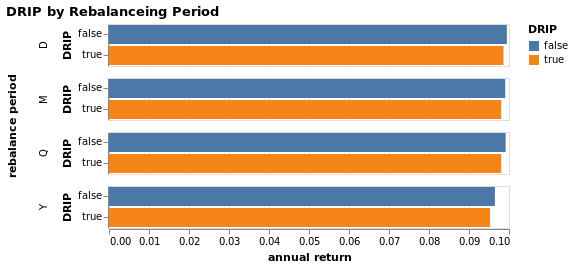

In [53]:
dr_reb=alt.Chart(dfag, title='DRIP by Rebalanceing Period').mark_bar().encode(
    y=alt.Y('drip:O', title='DRIP'),
    x=alt.X('mean(annual_return)', title='annual return'),
    color=alt.Color('drip', title='DRIP'), 
    row=alt.Row('rebalance_period', title='rebalance period')
    
)
dr_reb

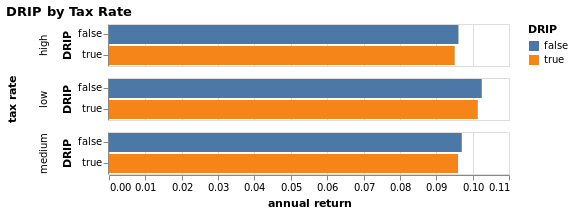

In [54]:
dr_reb=alt.Chart(dfag, title='DRIP by Tax Rate').mark_bar().encode(
    y=alt.Y('drip:O', title='DRIP'),
    x=alt.X('mean(annual_return):Q', title='annual return'),
    color=alt.Color('drip:N', title='DRIP'),
    row=alt.Row('tax_rate:N', title='tax rate')
)
dr_reb

Whether measured by tax rate, or rebalancing period, or other dimensions, DRIPs seem to yield no financial advantage. That is not to say they are not convenient and have other practical advantages. Increased returns just does not appear to be one of them. 

## Sweeping Cash to No Load Index Mutual Funds

The idea of this strategy is to invest any funds, be they deposits or dividends, from the cash account into no load, no transaction cost index funds until such time as a rebalancing occurs. Rebalancing could take time to happen due to the limits on the rebalancing or because of the rebalancing period being of long duration. 

Similar to DRIPs, by investing in no load mutual funds, idle cash is made active. What do the results show?

As was the case with DRIPs, all financial indicators are almost equal regardless of whether or not a mutual fund sweep was deployed. No further investigation is required for this strategy.

In [55]:
dfa.mean(level='mutual_fund')

ratios,annual_return,annual_volatility,cagr,calmar,cumm_return,max_drawdown,sharpe,sortino,tail_ratio
mutual_fund,,,,,,,,,
True,0.098165,0.144385,0.098165,0.805277,1.284724,-0.176429,0.872588,1.951741,0.926578
False,0.097879,0.143820,0.097879,0.805694,1.281484,-0.174689,0.871163,1.950463,0.926712


Comparing the returns of using mutual fund sweep strategy or not against broad or narrow rebalancing ranges, since this would effect the amount of cash lying dormant in the account. The results show the bar crossing the 50% mark for both the broad and narrow range, indicating that the mutual fund sweep has almost no effect on the outcome.

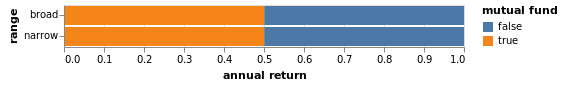

In [56]:
mf_rr = alt.Chart(dfag).mark_bar().encode(
    x = alt.X('mean(annual_return)', type='quantitative', stack='normalize', title='annual return'),
    y = alt.Y('rebalance_range:N', title='range'), 
    color=alt.Color('mutual_fund:N', title='mutual fund'),
)
mf_rr

## Adjusting the Range Around a Target Allocation

Rebalancing is typically triggered by a maximum or minimum asset level. Reducing the range will increase the number of trade events but keep the portfolio more in line with the target asset allocation.

Allocations for low, med, high risk are shown below. 

    Format of tuple is (target, narrow_low, narrow_high, wide_low, wide_high)
    
    low risk:    (0.25, 0.225, 0.275, 0.175, 0.325)
    medium risk: (0.50, 0.450, 0.550, 0.350, 0.650)
    high risk:   (0.75, 0.672, 0.825, 0.525, 0.975)

As with other account level results, the results for narrow and broad rebalancing ranges is almost identical.

In [57]:
dfa[['annual_return', 'annual_volatility', 'sharpe']].mean(level='rebalance_range')

ratios,annual_return,annual_volatility,sharpe
rebalance_range,,,
narrow,0.098326,0.143842,0.879219
broad,0.097718,0.144363,0.864532


Use of a wide or narrow allocation had little consistent impact over a wide range of start dates and other dimensions.

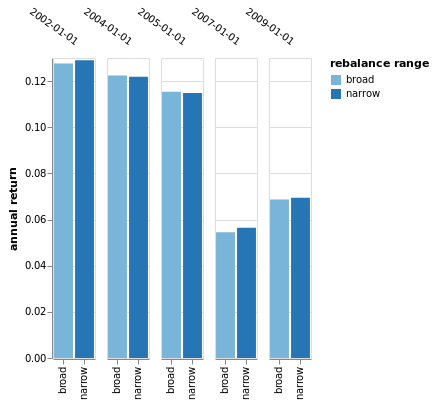

In [58]:
rr_st = alt.Chart(dfag).mark_bar().encode(
    x=alt.X('rebalance_range:O', title=""),
    y=alt.Y('mean(annual_return):Q', title='annual return'),
    column= alt.Column('start_date', 
                       title="", 
                      header=alt.Header(labelAngle=35)
                      ), 
    color=alt.Color('rebalance_range:O', 
                    title='rebalance range'
                   ),
)

rr_st 

## Increasing or decreasing the periodicity of rebalancing (e.g. annual, quarterly...)

Increasing or decreasing the periodicity of rebalancing a single account also had negligible impact on performance and risk ratios.

In [59]:
dfa[['annual_return', 'annual_volatility', 'sharpe']].mean(level=['rebalance_period'])

ratios,annual_return,annual_volatility,sharpe
rebalance_period,,,
D,0.099045,0.145120,0.874943
M,0.098556,0.144074,0.873537
Q,0.098609,0.143566,0.876159
Y,0.095879,0.143648,0.862861


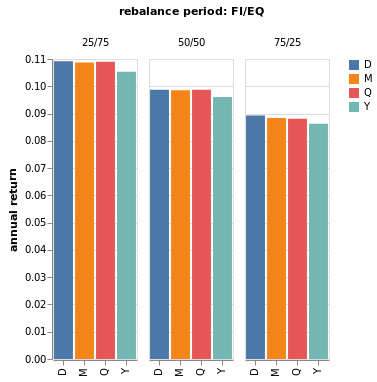

In [60]:
rp_risk = alt.Chart(dfag).mark_bar().encode(
    x = alt.X('rebalance_period:N', title=""),
    y = alt.Y('mean(annual_return)', title='annual return'), 
    color = alt.Color('rebalance_period', title=""), 
    column = alt.Column('asset_mix', title='rebalance period: FI/EQ')
)
rp_risk

# Account Level Summary

In conclusion, there is little to be gained from actively deploying manual strategies to passive portfolios at the account level. 

Below is a summary of all the effects.

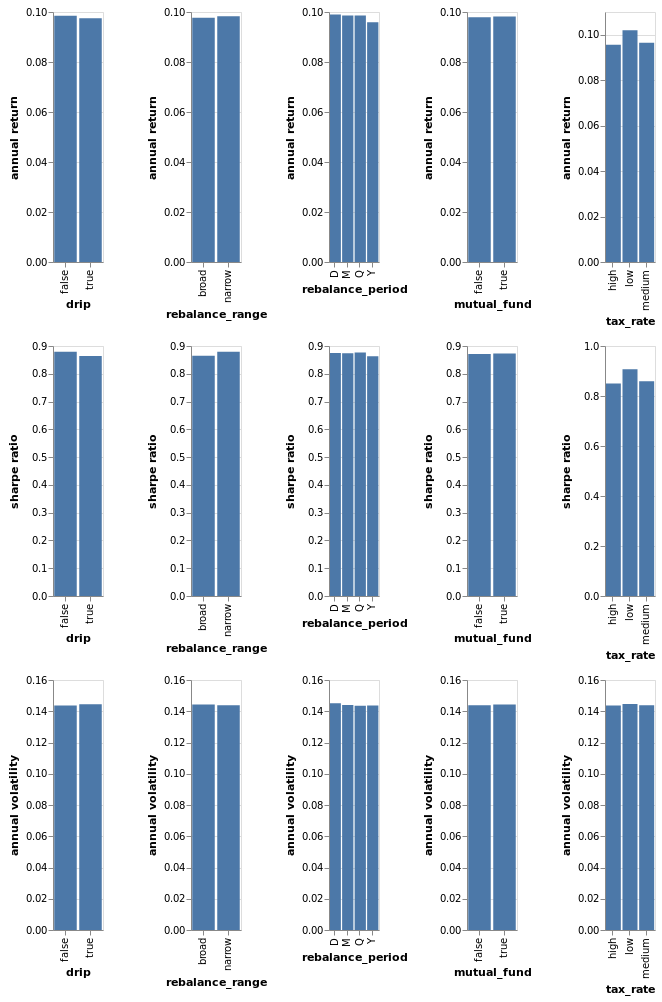

In [61]:
acct = dfa.reset_index()
acct[
    [
        "duration",
        "account_type",
        "rebalance_period",
        "tax_rate",
        "asset_mix",
        "rebalance_range",
        "mutual_fund"
    ]
] = acct[
    [
        "duration",
        "account_type",
        "rebalance_period",
        "tax_rate",
        "asset_mix",
        "rebalance_range",
        "mutual_fund"
    ]
].astype("category")

chart_return = alt.Chart(acct).mark_bar().encode(
    alt.X(alt.repeat('column'), type="nominal"),
    alt.Y('mean(annual_return)', type="quantitative", title='annual return'),
#     color = 'asset_mix'
).properties(
    width=50,
    height=250, 
).repeat(
    column=['drip', 'rebalance_range', 'rebalance_period', 'mutual_fund', 'tax_rate'], 
).interactive()

chart_sharpe = alt.Chart(acct).mark_bar().encode(
    alt.X(alt.repeat('column'), type="nominal"),
    alt.Y('mean(sharpe)', type="quantitative", title='sharpe ratio'),
#     color = 'asset_mix'
).properties(
    width=50,
    height=250
).repeat(
    column=['drip', 'rebalance_range', 'rebalance_period', 'mutual_fund', 'tax_rate']
).interactive()

chart_volatility = alt.Chart(acct).mark_bar().encode(
    alt.X(alt.repeat('column'), type="nominal"),
    alt.Y('mean(annual_volatility)', type="quantitative", title='annual volatility'),
#     color = 'asset_mix'
).properties(
    width=50,
    height=250
).repeat(
    column=['drip', 'rebalance_range', 'rebalance_period', 'mutual_fund', 'tax_rate']
).interactive()
chart_return & chart_sharpe & chart_volatility

# Tax efficient portfolio rebalancing

Account level mechanisms do not yield significant result over the time periods tested. Portfolio level testing was conducted using two people, p1 and p2, each managing $100,000 in after tax funds per account. Each invest had an investment account, a RRSP account, and a TFSA account. 

p1 is from a high tax bracket and p2 is from a lower tax bracket.

        High Tax Rate
        $150,000 annual income
        tax_rate  = 0.4641
        tax_div   = 0.3175
        tax_gains = 0.2320
        
        Low Tax Rate
        $50,000 annual income
        tax_rate  = 0.2965
        tax_div   = 0.0756
        tax_gains = 0.1482
        
The following scenarios were tested: 

-  accounts list: various orderings of accounts 
-  start date: various start dates from 2002-01-01 - 2009-01-01
-  duration: '3 year', '5 year', '10 year'
-  rebalance period: rebalanced by Day, Month, Quarter, Year
-  asset mix: fixed income/equity: 75/25, 50/50, 25/75
-  rebalance range: rebalance maximums and minimums, range from target, set for 'broad' and 'narrow'

Except for the account_list, all test resulted in similar results as in the account level testing, that is to say, no advantage to varying the coordinates in each dimension. 

### Duration

In [62]:
# Duration
dfp.loc[:,idx[:,['annual_return', 'sharpe']]].swaplevel(1,0,axis=1).sort_index(axis=1).mean(level='duration')

ratios             annual_return                          sharpe  \
account_portfolio return_account return_portfolio return_account   
duration                                                           
3 year                  0.090748         0.090379       1.167615   
5 year                  0.069403         0.069181       0.855903   
10 year                 0.060292         0.060191       0.782892   

ratios                              
account_portfolio return_portfolio  
duration                            
3 year                    1.172576  
5 year                    0.859471  
10 year                   0.787539

### Rebalance Period

In [63]:
# Rebalance Period
dfp.loc[:,idx[:,['annual_return', 'sharpe']]].swaplevel(1,0,axis=1).sort_index(axis=1).mean(level='rebalance_period')

ratios             annual_return                          sharpe  \
account_portfolio return_account return_portfolio return_account   
rebalance_period                                                   
D                       0.074147         0.073901       0.936242   
M                       0.073387         0.073223       0.937683   
Q                       0.073466         0.073265       0.939650   
Y                       0.072925         0.072612       0.928303   

ratios                              
account_portfolio return_portfolio  
rebalance_period                    
D                         0.940794  
M                         0.942066  
Q                         0.943951  
Y                         0.932638

### Asset Mix

In [64]:
# Asset Mix
dfp.loc[:,idx[:,['annual_return', 'sharpe']]].swaplevel(1,0,axis=1).sort_index(axis=1).mean(level='asset_mix')

ratios             annual_return                          sharpe  \
account_portfolio return_account return_portfolio return_account   
asset_mix                                                          
75/25                   0.063445         0.063753       1.172963   
50/50                   0.072836         0.072526       0.886871   
25/75                   0.084162         0.083472       0.746575   

ratios                              
account_portfolio return_portfolio  
asset_mix                           
75/25                     1.169359  
50/50                     0.899709  
25/75                     0.750519

### Rebalance Range

In [65]:
# Rebalance Range
dfp.loc[:,idx[:,['annual_return', 'sharpe']]].swaplevel(1,0,axis=1).sort_index(axis=1).mean(level='rebalance_range')

ratios             annual_return                          sharpe  \
account_portfolio return_account return_portfolio return_account   
rebalance_range                                                    
narrow                  0.074512         0.074361       0.953618   
broad                   0.072451         0.072140       0.917322   

ratios                              
account_portfolio return_portfolio  
rebalance_range                     
narrow                    0.959747  
broad                     0.919978

## Tax Efficient Rebalancing

In a household there will often be two investors with varying income levels and marginal tax rates. A general strategy is to place more of the tax efficient investments (e.g. stocks) in the taxable account, and also the higher return investment, again stocks, in the account of lower taxed investor. Following is a sample set of accounts with p1 being person1, the higher income investor, and p2 being person2, the lower income investor. Total investments are $500,000 and are divided into the following accounts: 

account |  p1    |     p2  
--------|-------:|--------:
tfsa    | 65,000 |  10,000   
rsp     |100,000 | 100,000  
inv     | 50,000 | 175,000  

The asset allocation is 

Cash: 10%  
Fixed Income: 40%  
Equity: 50%  

The table below shows the total portfolio being invested over 16 years. The overall strategy is maintained and the range of allocations can be seen around the targets.

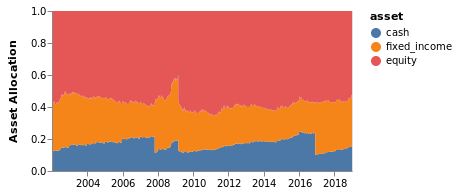

In [66]:
dfl.loc[dfl['asset']=='cash', 'sort_asset'] = 0
dfl.loc[dfl['asset']=='fixed_income', 'sort_asset'] = 1
dfl.loc[dfl['asset']=='equity', 'sort_asset'] = 2


base = (
    alt.Chart(dfl).mark_area().encode(
        x=alt.X(
            "trade_date:T", 
            title=""
        ),
        y=alt.Y(
            "sum(value):Q",
            stack="normalize",
            sort=["equity", "fixed_income", "cash"],
            title="Asset Allocation",
        ),
        color=alt.Color(
            "asset:N", 
            sort=["cash", "fixed_income", "equity"]
        ),
        order=alt.Order('sort_asset:N', sort='ascending')
    )
    .properties(width=300, height=160)
)
base

While the overall asset allocation discipline and targets are maintained, the story at the account level is significantly different. By investing stocks into more tax efficient portfolios, the resulting accounts do not match the overall portfolio objective whatsoever. Living with this divergence is one of the psychological aspects that must be dealt with at the retail level. 

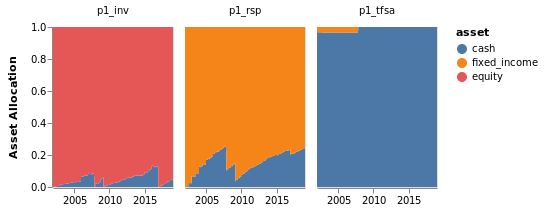

In [67]:
df_p1 = dfl[dfl['owner'] == 'p1']
df_p2 = dfl[dfl['owner'] == 'p2']

base_p1 = alt.Chart(df_p1).mark_area().encode(
    x=alt.X('trade_date:T', title=""), 
    y=alt.Y('sum(value):Q', stack='normalize', title="Asset Allocation"), 
    color=alt.Color('asset:N', sort=['cash', 'fixed_income', 'equity']),
    order=alt.Order('sort_asset:N', sort='ascending')
).properties(
    width=120,
    height=160
).facet(
    column=alt.Column('account:N', title=""), 
)
base_p2 = alt.Chart(df_p2).mark_area().encode(
    x=alt.X('trade_date:T', title=""), 
    y=alt.Y('sum(value):Q', stack='normalize', title="Asset Allocation"), 
    color=alt.Color('asset:N', sort=['cash', 'fixed_income', 'equity']),
    order=alt.Order('sort_asset:N', sort='ascending')
).properties(
    width=120,
    height=160
).facet(
    column=alt.Column('account:N', title=""),
)

base_p1

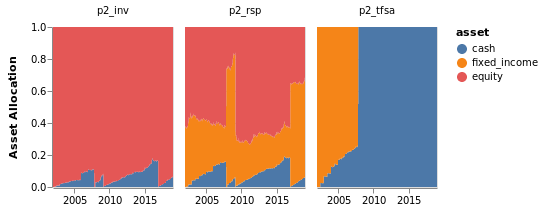

In [68]:
base_p2

# Results of Various Portfolio Account Mixes

The results of this analysis show a definite improvement in returns and other ratios in the following order: 

       1. [p2_inv, p1_inv, p2_rsp, p1_rsp, p2_tfsa, p1_tfsa]
       2. [p2_inv, p2_rsp, p2_tfsa, p1_inv, p1_rsp, p1_tfsa]
       3. [p1_inv, p1_rsp, p1_tfsa, p2_inv, p2_rsp, p2_tfsa]
       4. [p2_tfsa, p2_rsp, p2_inv, p1_tfsa, p1_rsp, p1_inv]
       5. [p1_tfsa, p1_rsp, p1_inv, p2_tfsa, p2_rsp, p2_inv]
       6. [p2_rsp, p1_rsp, p2_tfsa, p1_tfsa, p2_inv, p1_inv] 
       
Portfolio one has equity investments going to the taxable accounts first, and to the lowest income investor first.  Portfolio one has the best improvement overall showing a pick up in return of almost 25 bps. Portfolio two also showed an improvement, particularly in sharpe ratio. 
       

In [69]:
dfp.loc[:, idx[:, ["annual_return", 'annual_volatility', 'sharpe']]].swaplevel(0,1,axis=1).sort_index(axis=1).groupby('accounts_list').mean().sort_values(by=[("annual_return","return_portfolio")], ascending=False)

ratios                                              annual_return  \
account_portfolio                                  return_account   
accounts_list                                                       
[p2_inv, p1_inv, p2_rsp, p1_rsp, p2_tfsa, p1_tfsa]       0.073481   
[p2_inv, p2_rsp, p2_tfsa, p1_inv, p1_rsp, p1_tfsa]       0.073481   
[p1_inv, p1_rsp, p1_tfsa, p2_inv, p2_rsp, p2_tfsa]       0.073481   
[p2_tfsa, p2_rsp, p2_inv, p1_tfsa, p1_rsp, p1_inv]       0.073481   
[p1_tfsa, p1_rsp, p1_inv, p2_tfsa, p2_rsp, p2_inv]       0.073481   
[p2_rsp, p1_rsp, p2_tfsa, p1_tfsa, p2_inv, p1_inv]       0.073481   

ratios                                                               \
account_portfolio                                  return_portfolio   
accounts_list                                                         
[p2_inv, p1_inv, p2_rsp, p1_rsp, p2_tfsa, p1_tfsa]         0.075380   
[p2_inv, p2_rsp, p2_tfsa, p1_inv, p1_rsp, p1_tfsa]         0.074762   
[p1_inv, p1_rsp, p1_tfsa, p2_inv, p2_rsp, p2_tfsa]         0.073904   
[p2_tfsa, p2_rsp, p2_inv, p1_tfsa, p1_rsp, p1_inv]         0.073398   
[p1_tfsa, p1_rsp, p1_inv, p2_tfsa, p2_rsp, p2_inv]         0.072057   
[p2_rsp, p1_rsp, p2_tfsa, p1_tfsa, p2_inv, p1_inv]         0.070001   

ratios                                             annual_volatility  \
account_portfolio                                     return_account   
accounts_list                                                          
[p2_inv, p1_inv, p2_rsp, p1_rsp, p2_tfsa, p1_tfsa]          0.092111   
[p2_inv, p2_rsp, p2_tfsa, p1_inv, p1_rsp, p1_tfsa]          0.092111   
[p1_inv, p1_rsp, p1_tfsa, p2_inv, p2_rsp, p2_tfsa]          0.092111   
[p2_tfsa, p2_rsp, p2_inv, p1_tfsa, p1_rsp, p1_inv]          0.092111   
[p1_tfsa, p1_rsp, p1_inv, p2_tfsa, p2_rsp, p2_inv]          0.092111   
[p2_rsp, p1_rsp, p2_tfsa, p1_tfsa, p2_inv, p1_inv]          0.092111   

ratios                                                               \
account_portfolio                                  return_portfolio   
accounts_list                                                         
[p2_inv, p1_inv, p2_rsp, p1_rsp, p2_tfsa, p1_tfsa]         0.089442   
[p2_inv, p2_rsp, p2_tfsa, p1_inv, p1_rsp, p1_tfsa]         0.094802   
[p1_inv, p1_rsp, p1_tfsa, p2_inv, p2_rsp, p2_tfsa]         0.086830   
[p2_tfsa, p2_rsp, p2_inv, p1_tfsa, p1_rsp, p1_inv]         0.098085   
[p1_tfsa, p1_rsp, p1_inv, p2_tfsa, p2_rsp, p2_inv]         0.089348   
[p2_rsp, p1_rsp, p2_tfsa, p1_tfsa, p2_inv, p1_inv]         0.087735   

ratios                                                     sharpe  \
account_portfolio                                  return_account   
accounts_list                                                       
[p2_inv, p1_inv, p2_rsp, p1_rsp, p2_tfsa, p1_tfsa]        0.93547   
[p2_inv, p2_rsp, p2_tfsa, p1_inv, p1_rsp, p1_tfsa]        0.93547   
[p1_inv, p1_rsp, p1_tfsa, p2_inv, p2_rsp, p2_tfsa]        0.93547   
[p2_tfsa, p2_rsp, p2_inv, p1_tfsa, p1_rsp, p1_inv]        0.93547   
[p1_tfsa, p1_rsp, p1_inv, p2_tfsa, p2_rsp, p2_inv]        0.93547   
[p2_rsp, p1_rsp, p2_tfsa, p1_tfsa, p2_inv, p1_inv]        0.93547   

ratios                                                               
account_portfolio                                  return_portfolio  
accounts_list                                                        
[p2_inv, p1_inv, p2_rsp, p1_rsp, p2_tfsa, p1_tfsa]         0.963435  
[p2_inv, p2_rsp, p2_tfsa, p1_inv, p1_rsp, p1_tfsa]         0.926010  
[p1_inv, p1_rsp, p1_tfsa, p2_inv, p2_rsp, p2_tfsa]         0.986704  
[p2_tfsa, p2_rsp, p2_inv, p1_tfsa, p1_rsp, p1_inv]         0.891637  
[p1_tfsa, p1_rsp, p1_inv, p2_tfsa, p2_rsp, p2_inv]         0.935398  
[p2_rsp, p1_rsp, p2_tfsa, p1_tfsa, p2_inv, p1_inv]         0.935990

The general conclusion from the table above is that investing equities first in the lower income partner and also in the taxable account, can boost returns by approximately 19 bps over investing in the asset mixes in each account, and yield approximately 53 bps over the poorest performing allocation.  

For passive investing, this is significant in that investors expect the underperform the market by approximately the costs of the etfs, less the cost of trading and taxes. By using this strategy passive investors may be able to gain that back.

A further analysis was performed just using asset mix number one above, [p2_inv, p1_inv, p2_rsp, p1_rsp, p2_tfsa, p1_tfsa]. Looking at item one alone across various dimensions, a clear advantage for this mix emerges.   

### By start date: 

In [70]:
dfp.loc['[p2_inv, p1_inv, p2_rsp, p1_rsp, p2_tfsa, p1_tfsa]', idx[:,['annual_return','sharpe']]].swaplevel(0,1,axis=1).sort_index(axis=1).groupby('start_date').mean()

ratios             annual_return                          sharpe  \
account_portfolio return_account return_portfolio return_account   
start_date                                                         
2002-01-01              0.085360         0.088495       1.108199   
2004-01-01              0.086410         0.088081       1.075743   
2005-01-01              0.088639         0.089347       1.062155   
2007-01-01              0.034729         0.037762       0.468676   
2009-01-01              0.072268         0.073216       0.962576   

ratios                              
account_portfolio return_portfolio  
start_date                          
2002-01-01                1.151816  
2004-01-01                1.104591  
2005-01-01                1.081266  
2007-01-01                0.499144  
2009-01-01                0.980358

### By duration.

In [71]:
dfp.loc['[p2_inv, p1_inv, p2_rsp, p1_rsp, p2_tfsa, p1_tfsa]', idx[:,['annual_return','sharpe']]].swaplevel(0,1,axis=1).sort_index(axis=1).groupby('duration').mean()

ratios             annual_return                          sharpe  \
account_portfolio return_account return_portfolio return_account   
duration                                                           
10 year                 0.060292         0.061670       0.782892   
3 year                  0.090748         0.092984       1.167615   
5 year                  0.069403         0.071487       0.855903   

ratios                              
account_portfolio return_portfolio  
duration                            
10 year                   0.805756  
3 year                    1.200925  
5 year                    0.883624

### By rebalancing range.

In [72]:
dfp.loc['[p2_inv, p1_inv, p2_rsp, p1_rsp, p2_tfsa, p1_tfsa]', idx[:,['annual_return','sharpe']]].swaplevel(0,1,axis=1).sort_index(axis=1).groupby('rebalance_range').mean()

ratios             annual_return                          sharpe  \
account_portfolio return_account return_portfolio return_account   
rebalance_range                                                    
broad                   0.072451         0.074218       0.917322   
narrow                  0.074512         0.076542       0.953618   

ratios                              
account_portfolio return_portfolio  
rebalance_range                     
broad                     0.944151  
narrow                    0.982719

### More Tests

All of this suggest that more test are required. Dimensions will be adjusted as follows: 

- Duration will be set to five years. 
- Rebalancing period will be set to monthly.
- Accounts tested: 
       1. [p2_inv, p1_inv, p2_rsp, p1_rsp, p2_tfsa, p1_tfsa]
       2. [p2_inv, p2_rsp, p2_tfsa, p1_inv, p1_rsp, p1_tfsa]
- Rebalance range set to narrow.
- Asset allocation over all three fixed income/equity; 75/25, 50/50, 25/75.

Starting dates will be semi-annually starting 2002-01-01 and carrying on until 2010-01-01. This will provide a more thorough date sampling.  The evidence from the analysis shows that the advantage of allocating stocks into taxable accounts and with lower income investors continues to hold true.


In [73]:
dff.loc[:, idx[:, ["annual_return", 'annual_volatility', 'sharpe']]].mean(level=[0]).sort_values(by=[("return_portfolio", "annual_return")], ascending=False)

account_portfolio                                  return_account  \
ratios                                              annual_return   
accounts_list                                                       
[p2_inv, p1_inv, p2_rsp, p1_rsp, p2_tfsa, p1_tfsa]       0.070183   
[p2_inv, p2_rsp, p2_tfsa, p1_inv, p1_rsp, p1_tfsa]       0.070183   

account_portfolio                                                     \
ratios                                             annual_volatility   
accounts_list                                                          
[p2_inv, p1_inv, p2_rsp, p1_rsp, p2_tfsa, p1_tfsa]          0.098826   
[p2_inv, p2_rsp, p2_tfsa, p1_inv, p1_rsp, p1_tfsa]          0.098826   

account_portfolio                                            return_portfolio  \
ratios                                                sharpe    annual_return   
accounts_list                                                                   
[p2_inv, p1_inv, p2_rsp, p1_rsp, p2_tfsa, p1_tfsa]  0.863835         0.072436   
[p2_inv, p2_rsp, p2_tfsa, p1_inv, p1_rsp, p1_tfsa]  0.863835         0.071462   

account_portfolio                                                               
ratios                                             annual_volatility    sharpe  
accounts_list                                                                   
[p2_inv, p1_inv, p2_rsp, p1_rsp, p2_tfsa, p1_tfsa]          0.095919  0.890310  
[p2_inv, p2_rsp, p2_tfsa, p1_inv, p1_rsp, p1_tfsa]          0.101607  0.855278

### For One Investor

Investing the portfolios for just one investor, again investing stock in the taxable account achieves greater returns than the other mixes.

In [74]:
dft.loc[:, idx[:,['annual_return','sharpe']]].swaplevel(0,1,axis=1).sort_index(axis=1).groupby('accounts_list').mean().sort_values(by=[("annual_return", "return_portfolio")], ascending=False)

ratios                      annual_return                          sharpe  \
account_portfolio          return_account return_portfolio return_account   
accounts_list                                                               
[p2_inv, p2_rsp, p2_tfsa]        0.072621         0.074084       0.878688   
[p2_tfsa, p2_rsp, p2_inv,]       0.072621         0.071245       0.878688   
[p1_inv, p1_rsp, p1_tfsa]        0.067691         0.070657       0.847833   
[p2_rsp, p2_tfsa, p2_inv]        0.072621         0.070440       0.878688   
[p1_tfsa, p1_rsp, p1_inv,]       0.067691         0.064954       0.847833   
[p1_rsp, p1_tfsa, p1_inv]        0.067691         0.062801       0.847833   

ratios                                       
account_portfolio          return_portfolio  
accounts_list                                
[p2_inv, p2_rsp, p2_tfsa]          0.903244  
[p2_tfsa, p2_rsp, p2_inv,]         0.845525  
[p1_inv, p1_rsp, p1_tfsa]          0.902158  
[p2_rsp, p2_tfsa, p2_inv]          0.885253  
[p1_tfsa, p1_rsp, p1_inv,]         0.776031  
[p1_rsp, p1_tfsa, p1_inv]          0.867494

# Conclusion

This analysis looked at the after-tax returns of basic Canadian fixed income and equity accounts and portfolios from 2002 - 2018. It looked at traditional mechanisms for trying to enhance returns and found that most do not offer increased yields over the time measured. 

However, it was determined that by managing the asset allocation process so that equities are favoured in taxable accounts as well as the lower income partner or spouse when available, that almost 25 bps of extra yield could be achieved over doing nothing and up to 50 bps over the poorest performing allocation. 

Given that passive investors typically underperform the market by the expense ratio of the exchange traded fund, this strategy could help to put the investor on par with the market itself. 

The software built for this analysis can only review two funds at a time. Further research could be done on multi-asset portfolios to determine if allocating equities to lower tax individuals and taxable accounts will still pick up yield over allocating by individual accounts.

